In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Ipynb_importer
from utils_x import *
from parameters_x import *
import seaborn as sns
import datetime
from scipy.stats import norm
sns.set(style="darkgrid")
import logging
import time

# 训练日志
logger = logging.getLogger(__name__)
logger.setLevel(level = logging.INFO)
handler = logging.FileHandler("log/log" + str(time.ctime()) + ".txt")
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
console = logging.StreamHandler()
console.setLevel(logging.INFO)
logger.addHandler(handler)
logger.addHandler(console)

importing Jupyter notebook from utils_x.ipynb
importing Jupyter notebook from parameters_x.ipynb


In [2]:
print("----------------- load data--------------------")
data = pd.read_csv('index500_v3_adjustment.csv')
data["date_time"]  = pd.to_datetime(data["date_time"])
del data["Unnamed: 0"]

print("----------------- limit_tag--------------------")
gb = data.groupby(['unique_symbol'])['adjustment_cumsum']
data['t+1_adjustment_cumsum'] = gb.transform(lambda x: x.shift(-1))
data["limit_tag"]  = (data["t+1_open"] - data["t+1_adjustment_cumsum"] + data["adjustment_cumsum"]) /data["close"] -1
data["limit_tag"] = data["limit_tag"].apply(lambda x: 1 if x >= 0.099 else 0)

print("------------------- label --------------------")
data =  data[data["use_tag"] == 1].copy()
gb = data.groupby(['date_time'])['return']
data['label'] = gb.transform(lambda x: (x-x.mean())/x.std())
data['mr'] = gb.transform(lambda x: x.mean())


----------------- load data--------------------
----------------- limit_tag--------------------
------------------- label --------------------


In [3]:
print("---------------- stationary pre--------------------")

data["r"] = data["close"]/ data["open"] - 1
data["amplitude"] = (data["high"] - data["low"]) / data["close"]
data["amplitude_ratio"] =  abs((data["close"] - data["open"])/(data["high"] - data["low"]))
gb = data.groupby(['date_time'])['open']
data['open'] = gb.transform(lambda x: (x-x.mean())/x.std())
gb = data.groupby(['date_time'])['close']
data['close'] = gb.transform(lambda x: (x-x.mean())/x.std())
gb = data.groupby(['date_time'])['turnover']
data['turnover'] = gb.transform(lambda x: (x-x.mean())/x.std())
gb = data.groupby(['date_time'])['volume']
data['volume'] = gb.transform(lambda x: (x-x.mean())/x.std())
# gb = data.groupby(['date_time'])['high']
# data['high'] = gb.transform(lambda x: (x-x.mean())/x.std())
# gb = data.groupby(['date_time'])['low']
# data['low'] = gb.transform(lambda x: (x-x.mean())/x.std())
# gb = data.groupby(['date_time'])['wap']
# data['wap'] = gb.transform(lambda x: (x-x.mean())/x.std())

print(data)
p_col = ['close', 'open', 'high', 'low', 'wap']
v_col = ['turnover', 'volume']
n_shift = 15
vol_factor = []
for factor_name in v_col:
    for i in range(1,n_shift):
#         form = "uniform"
        form = ""
#         data[form + factor_name + str(i)] = rank2norm(data, "date_time", factor_name + str(i))
        print(form + factor_name + str(i))
        vol_factor.append(form + factor_name + str(i))
return_factor = []
for factor_name in p_col:
    for i in range(1,n_shift):
        return_factor.append(factor_name + str(i))


---------------- stationary pre--------------------
         unique_symbol  date_time     close  turnover      open   high    low  \
2               600189 2010-01-29 -0.600878 -0.573116 -0.591930   9.69   9.42   
3               600190 2010-01-29 -1.068747 -0.588743 -1.056306   5.92   5.81   
4               600191 2010-01-29 -0.751355 -0.437039 -0.746722   8.45   8.17   
5               600192 2010-01-29 -0.451665 -0.560889 -0.444878  10.86  10.50   
7               600195 2010-01-29  1.183350  0.916641  1.113362  24.12  22.48   
...                ...        ...       ...       ...       ...    ...    ...   
4560107         300039 2017-12-27 -0.607294 -0.475564 -0.603361   6.19   6.09   
4560111         300043 2017-12-27 -0.608527 -0.469235 -0.604578   6.18   6.04   
4560120         300001 2017-12-27 -0.144313 -0.412997 -0.162283  13.66  13.34   
4560121         300002 2017-12-27 -0.609144 -0.405373 -0.610662   6.16   6.04   
4560166            960 2017-12-27 -0.202263  0.358325 -0.

In [4]:
# today_factor = ["r", 'close', 'open', 'turnover', "volume", "amplitude", "high", "low", "wap"]
today_factor = ["r", 'close', 'open', 'turnover', "volume", "amplitude"]
use_f = set()
use_f = set(return_factor) | set(today_factor) | set(vol_factor)
use_f = list(use_f)
logger.info("return_factor")
logger.info(set(return_factor))
logger.info("today_factor")
logger.info(set(today_factor))
logger.info("vol_factor")
logger.info(set(vol_factor))
logger.info("len(use_f):")
logger.info(len(use_f))

return_factor
{'close6', 'high3', 'high10', 'low3', 'wap5', 'low7', 'close10', 'low9', 'open14', 'high8', 'high5', 'low11', 'high9', 'wap6', 'wap8', 'low14', 'wap4', 'low13', 'open5', 'open9', 'wap9', 'open4', 'wap1', 'close3', 'open11', 'open1', 'high14', 'close7', 'low6', 'wap2', 'close12', 'close5', 'wap13', 'close1', 'close9', 'wap10', 'low5', 'high12', 'low12', 'high13', 'high1', 'wap12', 'open7', 'close4', 'open8', 'low8', 'open13', 'wap7', 'close13', 'open12', 'close8', 'open10', 'low1', 'close11', 'close14', 'wap14', 'close2', 'open3', 'wap3', 'wap11', 'low4', 'open6', 'high4', 'high2', 'high7', 'low10', 'high6', 'low2', 'open2', 'high11'}
today_factor
{'volume', 'open', 'turnover', 'amplitude', 'r', 'close'}
vol_factor
{'turnover9', 'turnover1', 'turnover7', 'volume4', 'turnover8', 'volume8', 'volume9', 'volume13', 'turnover3', 'turnover2', 'turnover11', 'volume7', 'volume14', 'volume1', 'volume3', 'volume2', 'turnover12', 'turnover6', 'turnover4', 'volume6', 'volume11', 'turn

In [5]:

print(data["label"].mean())
data = data.dropna(how='any',axis=0)
print(data["label"].mean())
data = data[~data['return'].isnull()].copy()
print(data["label"].mean())   
    
print("-------------------- train -----------------------")
for i in range(1):
    
    t1 = datetime.datetime(2010,1,1)
    t2 = datetime.datetime(2013,1,1)
    t3 = datetime.datetime(2014,1,1)
    t4 = datetime.datetime(2015,1,1)
    data_tr = data[ (data["date_time"] >= t1)&(data["date_time"] < t2)]
    data_te = data[ (data["date_time"] >= t2)&(data["date_time"] < t3)]
    data_fin = data[ (data["date_time"] >= t3)&(data["date_time"] < t4)]
    print(len(data_tr["date_time"]))
    print(len(data_te["date_time"]))
    print(len(data_fin["date_time"]))
    
    X_train = data_tr[use_f]
    y_train = data_tr['label']
    X_test = data_te[use_f]
    y_test = data_te['label']

    market_return = list(data[data["date_time"].isin(list(data_fin.date_time))].groupby(['date_time'])['return'].mean())
    logger.info(params)
    bst = train_op(X_train, y_train, params, num_rounds, X_test, y_test, early)  
    importance_dic = f_importance(bst, use_f)
    preds = bst.predict(xgb.DMatrix(data_fin[use_f]), ntree_limit=bst.best_ntree_limit)
    data_fin["preds"] = list(preds)

1.83430253417967e-18
-0.0004643504839445264
-0.0004643504839445264
-------------------- train -----------------------
337528
116178
116302


{'task': 'train', 'booster': 'dart', 'max_depth': 6, 'nthread': 15, 'alpha': 100}
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	train-rmse:1.05547	eval-rmse:1.05455
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 45 rounds.
[1]	train-rmse:1.02468	eval-rmse:1.0236
[2]	train-rmse:1.00872	eval-rmse:1.00795
[3]	train-rmse:1.00032	eval-rmse:1.00006
[4]	train-rmse:0.995747	eval-rmse:0.99597
[5]	train-rmse:0.99315	eval-rmse:0.993729
[6]	train-rmse:0.991591	eval-rmse:0.992453
[7]	train-rmse:0.990565	eval-rmse:0.991849
[8]	train-rmse:0.989774	eval-rmse:0.99147
[9]	train-rmse:0.988988	eval-rmse:0.990995
[10]	train-rmse:0.988534	eval-rmse:0.990837
[11]	train-rmse:0.988022	eval-rmse:0.990716
[12]	train-rmse:0.987592	eval-rmse:0.990437
[13]	train-rmse:0.987146	eval-rmse:0.99026
[14]	train-rmse:0.98659	eval-rmse:0.990157
[15]	train-rmse:0.986137	eval-rmse:0.990072
[16]	train-rmse:0.985699	eval-rmse:0.990048
[17]	train-rmse:0.985449	eval-rmse:0.989972
[18]	train-rmse:0.984931	eval-rmse:0.98975
[19]	train-rmse:0.984495	eval-rmse:0.989578
[2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
print(data["label"].sum())

-420.307304892872


In [7]:
gb = data_fin.groupby(['date_time'])['preds']
rank_level = 10
data_fin["pred_rank"] = gb.transform(lambda x: pd.qcut(x.rank(method='first'), rank_level, labels=False, duplicates="drop"))
portfolio_df = data_fin[data_fin["pred_rank"] == rank_level-1]
portfolio_limit_df = portfolio_df[portfolio_df["limit_tag"] ==0] 
portfolio_return = portfolio_df.groupby(["date_time"])["return"].mean()
marker_return = portfolio_df.groupby(["date_time"])["return"].mean()
data_fin["market_return"] = data_fin.groupby(["date_time"])["return"].transform("mean")
portfolio_limit_return = portfolio_limit_df.groupby(["date_time"])["return"].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
gb1 = data_fin.groupby(['date_time'])['return']
day_pred = []
for _, x in gb1:
    print(_, len(x))
    day_pred.append(np.array(x)[:450])

2014-01-02 00:00:00 488
2014-01-03 00:00:00 485
2014-01-06 00:00:00 487
2014-01-07 00:00:00 487
2014-01-08 00:00:00 488
2014-01-09 00:00:00 489
2014-01-10 00:00:00 490
2014-01-13 00:00:00 489
2014-01-14 00:00:00 488
2014-01-15 00:00:00 488
2014-01-16 00:00:00 488
2014-01-17 00:00:00 486
2014-01-20 00:00:00 484
2014-01-21 00:00:00 485
2014-01-22 00:00:00 484
2014-01-23 00:00:00 486
2014-01-24 00:00:00 488
2014-01-27 00:00:00 488
2014-01-28 00:00:00 489
2014-01-29 00:00:00 489
2014-01-30 00:00:00 489
2014-02-07 00:00:00 488
2014-02-10 00:00:00 485
2014-02-11 00:00:00 486
2014-02-12 00:00:00 486
2014-02-13 00:00:00 484
2014-02-14 00:00:00 484
2014-02-17 00:00:00 479
2014-02-18 00:00:00 479
2014-02-19 00:00:00 481
2014-02-20 00:00:00 478
2014-02-21 00:00:00 479
2014-02-24 00:00:00 479
2014-02-25 00:00:00 481
2014-02-26 00:00:00 481
2014-02-27 00:00:00 482
2014-02-28 00:00:00 483
2014-03-03 00:00:00 482
2014-03-04 00:00:00 482
2014-03-05 00:00:00 483
2014-03-06 00:00:00 480
2014-03-07 00:00

avg: 0.04160549544131872


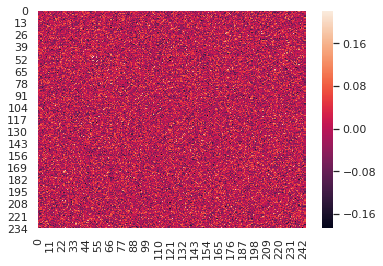

In [9]:
q = np.corrcoef(day_pred)
print("avg:", np.mean(np.abs(q)))
for i in range(len(q)):
    q[i][i]=0
sns.heatmap(q)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


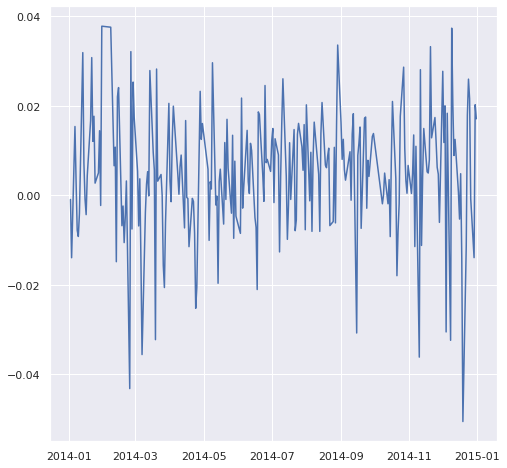

In [10]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.plot(portfolio_return)

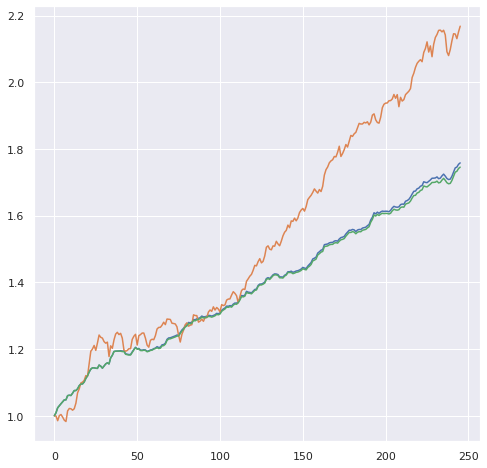

In [11]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.plot(add_return(np.array(portfolio_return)-np.array(market_return)))
plt.plot(add_return(np.array(portfolio_return)))
plt.plot(add_return(np.array(portfolio_limit_return)-np.array(market_return)))

In [12]:
def plot_conditional_expectation(x, y, quantile_n = 20):
    step = 1 / quantile_n
    bin_cut = np.percentile(x, list(np.append(np.arange(0,1,step), 1)*100) )
    bin_cut = np.unique(bin_cut)
    tmp = pd.DataFrame({'x':x.flatten(), 'y':y.flatten()})
    tmp['bin_cut'] = pd.cut(tmp['x'],bin_cut,include_lowest=True)
    groupby_mean = tmp.groupby('bin_cut').mean().reset_index()

    plt.figure(figsize=(12,4))
    plt.plot(groupby_mean['x'], groupby_mean['y'], '-o')
    plt.axvline(x=0, color='r', ls='-.')
    plt.axhline(y=0, color='r', ls='-.')
    plt.show()
        
    return groupby_mean

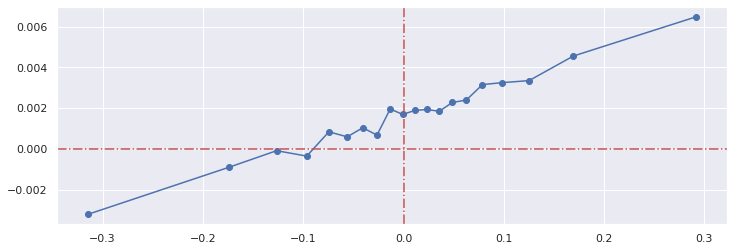

,bin_cut,x,y
0,"(-0.984, -0.209]",-0.315002,-0.003215
1,"(-0.209, -0.146]",-0.173547,-0.000892
2,"(-0.146, -0.11]",-0.126536,-0.000087
3,"(-0.11, -0.0846]",-0.096522,-0.000353
4,"(-0.0846, -0.0647]",-0.074408,0.000840
5,"(-0.0647, -0.048]",-0.056168,0.000592
6,"(-0.048, -0.0334]",-0.040620,0.001039
7,"(-0.0334, -0.0197]",-0.026466,0.000675
8,"(-0.0197, -0.0069]",-0.013274,0.001959
9,"(-0.0069, 0.00539]",-0.000692,0.001691


In [13]:
plot_conditional_expectation( np.array(data_fin["preds"]),np.array(data_fin["return"]))

In [14]:
# sns.jointplot(
#               x = data_fin["preds"], y = data_fin["return"], 
#               data = data_fin,  #设置数据                                 
#               kind="reg",                                     
#               size = 8, #图表大小(自动调整为正方形))             
#               ratio = 5, #散点图与布局图高度比，整型             
#               marginal_kws = dict(bins=15, rug =True),              
#              )

In [15]:
for i in range(10):
    temp_df = data_fin[data_fin["pred_rank"] == i ]
    print(i, np.corrcoef(temp_df["return"] - temp_df["market_return"], temp_df["preds"])[0,1])

0 0.04232315476141751
1 0.0018546483747332483
2 0.005462072722769345
3 0.01937572940104525
4 0.008812156634179467
5 0.01359252705202304
6 0.01293777984144338
7 0.027241087257810236
8 0.014292568529714944
9 0.05428256830155416


In [16]:
for i in range(10):
    temp_df = data_fin[data_fin["pred_rank"] == i ]
    print(i, np.corrcoef(temp_df["return"], temp_df["preds"])[0,1])

0 0.05927416143792855
1 0.024050617431321173
2 0.013397355094770668
3 0.01002374156988103
4 0.006410315760008515
5 0.015983973065261853
6 0.020925765554730642
7 0.04228150250111027
8 0.04043933702174209
9 0.06416423343728889


In [17]:
logger.info("d500mean_corrcoef")
logger.info(np.corrcoef(data_fin["return"] - data_fin["market_return"] , data_fin["preds"])[0,1])

d500mean_corrcoef
0.0864917814396632


In [18]:
logger.info("row_corrcoef")
logger.info(np.corrcoef(data_fin["return"] , data_fin["preds"])[0,1])

row_corrcoef
0.0804469215722358


In [19]:
logger.info("dmarketmean_corrcoef")
logger.info(np.corrcoef(data_fin["return"] - data_fin["mr"] , data_fin["preds"])[0,1])

dmarketmean_corrcoef
0.08654481257319875


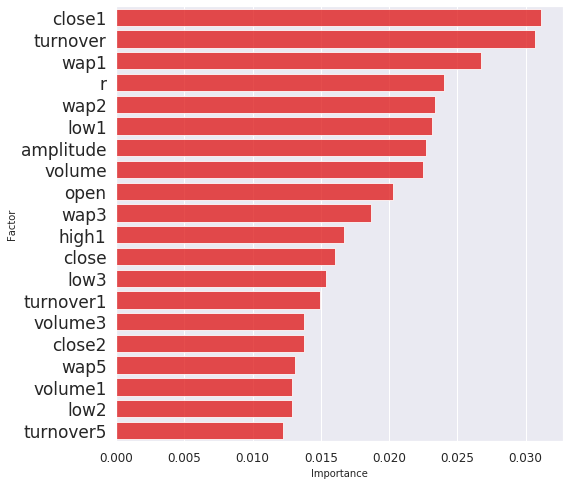

In [20]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.tick_params(labelsize=12)
f_importance_bar(importance_dic)

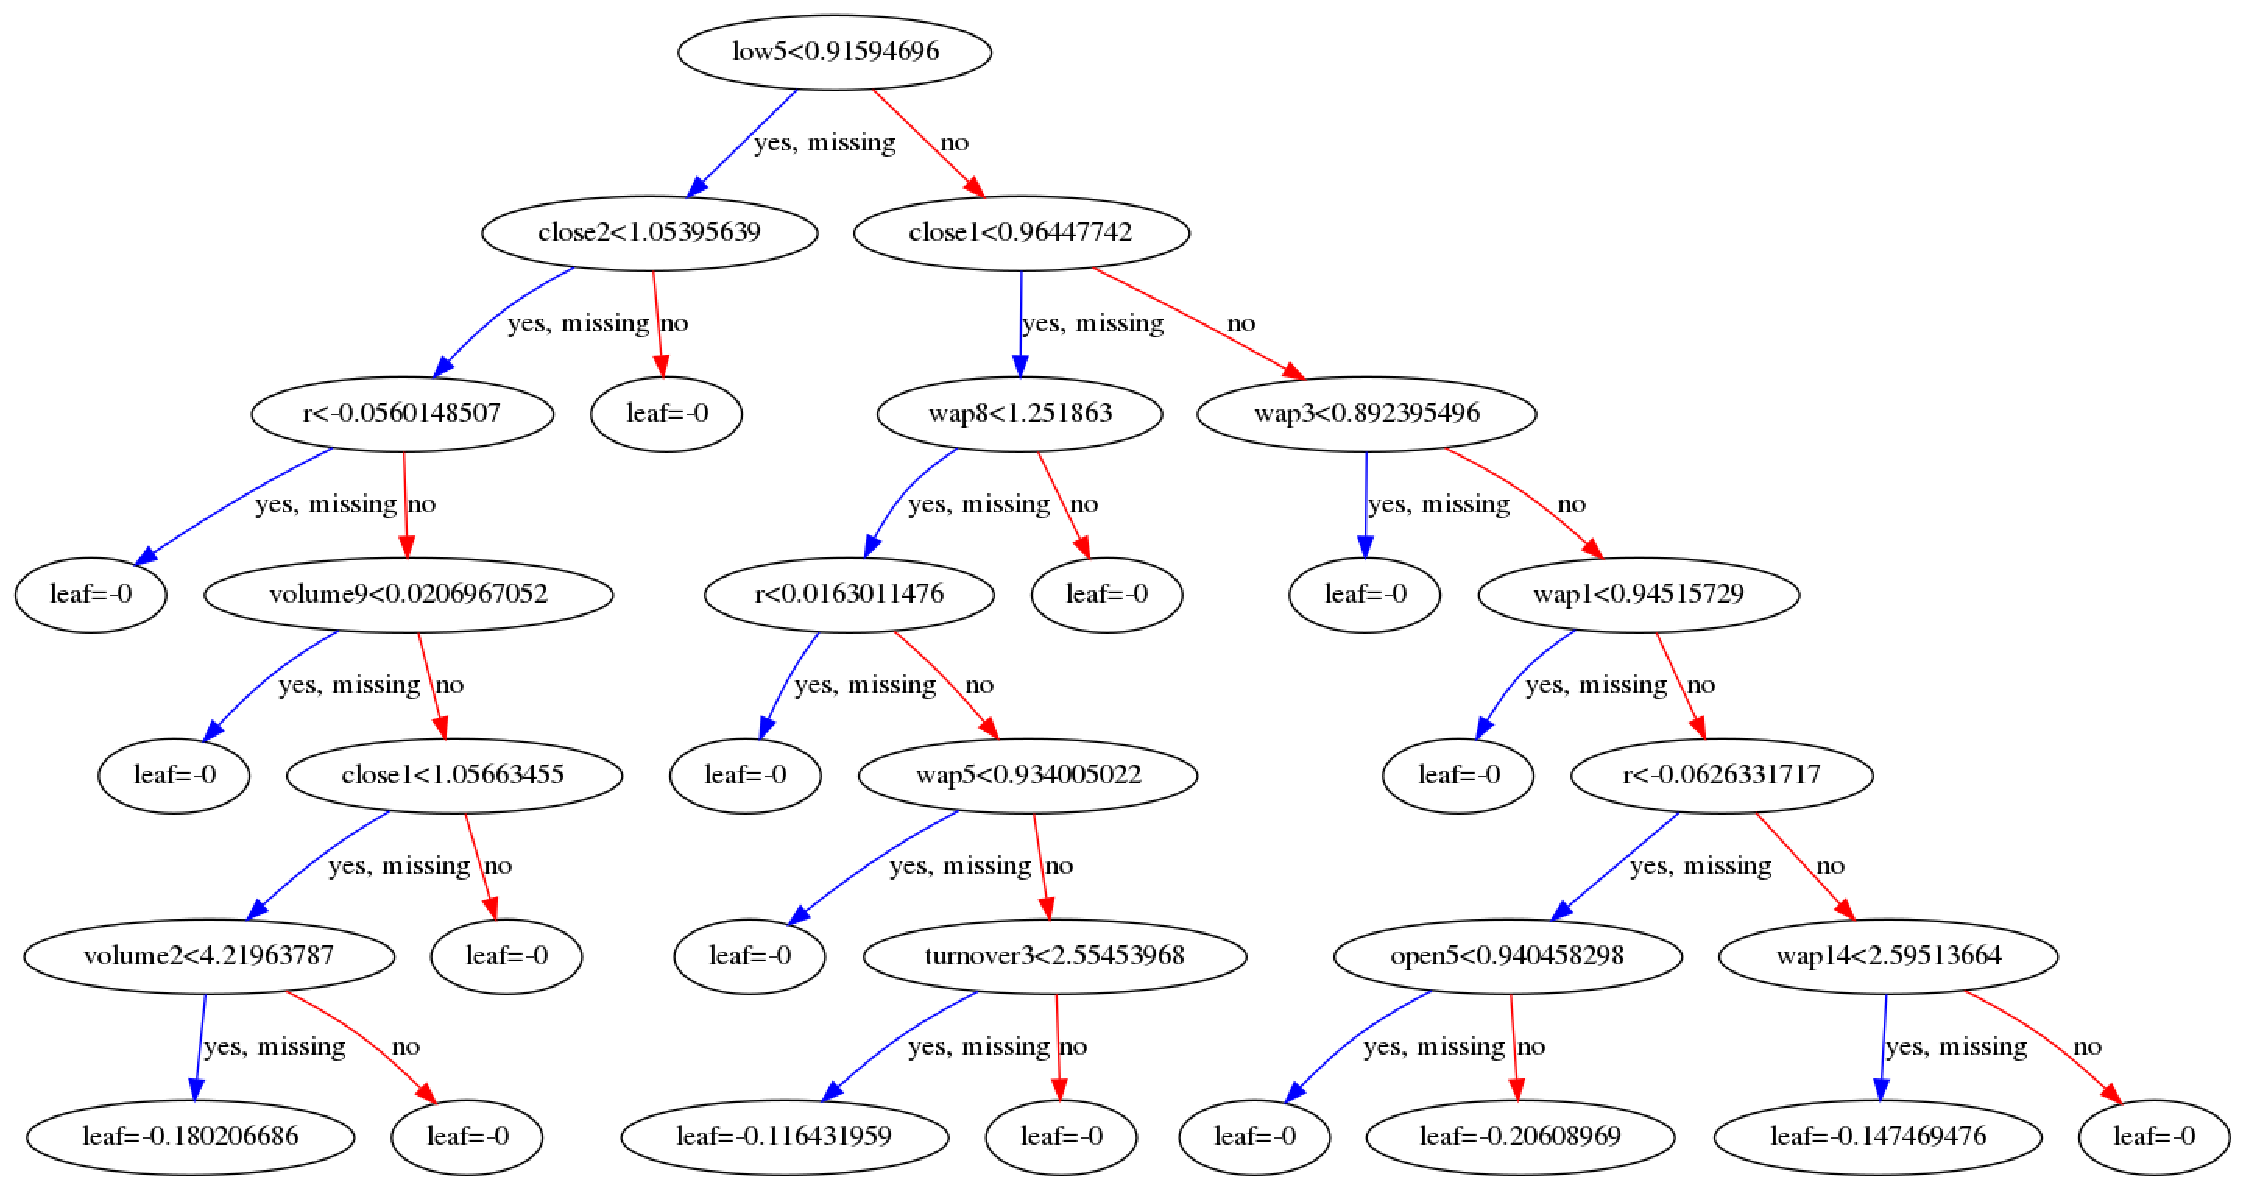

In [21]:
plt.rcParams['figure.figsize'] = (40.0, 38.0)
xgb.plot_tree(bst, num_trees=0)
plt.show()

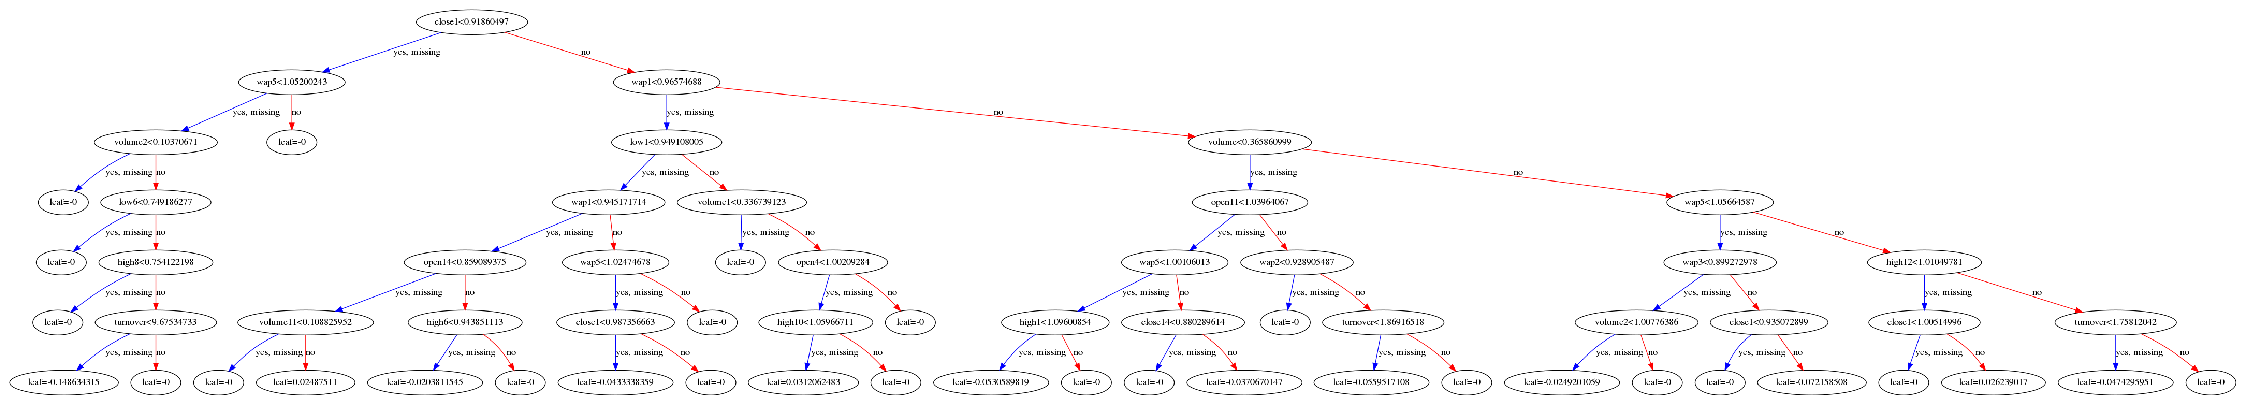

In [22]:
plt.rcParams['figure.figsize'] = (40.0, 38.0)
xgb.plot_tree(bst, num_trees=3)
plt.show()

In [23]:
df_tree = bst.trees_to_dataframe()

In [24]:
logger.info(df_tree)

      Tree  Node      ID Feature     Split  Yes   No Missing        Gain  \
0        0     0     0-0    low5  0.915947  0-1  0-2     0-1  218.140625   
1        0     1     0-1  close2  1.053956  0-3  0-4     0-3  100.630859   
2        0     2     0-2  close1  0.964477  0-5  0-6     0-5   80.601562   
3        0     3     0-3       r -0.056015  0-7  0-8     0-7   36.877930   
4        0     4     0-4    Leaf       NaN  NaN  NaN     NaN   -0.000000   
...    ...   ...     ...     ...       ...  ...  ...     ...         ...   
9082   100    72  100-72    Leaf       NaN  NaN  NaN     NaN   -0.004310   
9083   100    73  100-73    Leaf       NaN  NaN  NaN     NaN   -0.000000   
9084   100    74  100-74    Leaf       NaN  NaN  NaN     NaN    0.010410   
9085   100    75  100-75    Leaf       NaN  NaN  NaN     NaN   -0.003095   
9086   100    76  100-76    Leaf       NaN  NaN  NaN     NaN    0.000104   

         Cover  
0     337528.0  
1      34288.0  
2     303240.0  
3      33951.0  
4 

In [25]:
df_tree[(df_tree["Feature"] == "Leaf")]

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
4,0,4,0-4,Leaf,NaN,NaN,NaN,NaN,-0.000000,337.0
7,0,7,0-7,Leaf,NaN,NaN,NaN,NaN,-0.000000,145.0
10,0,10,0-10,Leaf,NaN,NaN,NaN,NaN,-0.000000,150.0
11,0,11,0-11,Leaf,NaN,NaN,NaN,NaN,-0.000000,215.0
13,0,13,0-13,Leaf,NaN,NaN,NaN,NaN,-0.000000,11.0
...,...,...,...,...,...,...,...,...,...,...
9082,100,72,100-72,Leaf,NaN,NaN,NaN,NaN,-0.004310,10499.0
9083,100,73,100-73,Leaf,NaN,NaN,NaN,NaN,-0.000000,11168.0
9084,100,74,100-74,Leaf,NaN,NaN,NaN,NaN,0.010410,5126.0
9085,100,75,100-75,Leaf,NaN,NaN,NaN,NaN,-0.003095,24318.0


In [26]:
all_tree_rounds = bst.best_ntree_limit + early
tr_step = []
te_step = []
fin_step = []
for i in range(1, all_tree_rounds):
    if i % 5==0:
        print("Tree numbers：" ,i ,"best_ntree_limit:", bst.best_ntree_limit, "early_stop:", early)
    temp1 = bst.predict( xgb.DMatrix(data_tr[use_f]),ntree_limit= i)
    temp2 = bst.predict( xgb.DMatrix(data_te[use_f]),ntree_limit= i)
    temp3 = bst.predict( xgb.DMatrix(data_fin[use_f]),ntree_limit= i)
    corrcoef1 = np.corrcoef(temp1, data_tr["return"])[0,1]
    corrcoef2 = np.corrcoef(temp2, data_te["return"])[0,1]
    corrcoef3 = np.corrcoef(temp3, data_fin["return"])[0,1]
    tr_rmse = ((temp1 - data_tr["label"])*(temp1 - data_tr["label"])).mean()
    te_rmse = ((temp2 - data_te["label"])*(temp2 - data_te["label"])).mean()
    fin_rmse = ((temp3 - data_fin["label"])*(temp3 - data_fin["label"])).mean()
    tr_step.append([tr_rmse, corrcoef1])
    te_step.append([te_rmse, corrcoef2])
    fin_step.append([fin_rmse, corrcoef3])

Tree numbers： 5 best_ntree_limit: 56 early_stop: 45
Tree numbers： 10 best_ntree_limit: 56 early_stop: 45
Tree numbers： 15 best_ntree_limit: 56 early_stop: 45
Tree numbers： 20 best_ntree_limit: 56 early_stop: 45
Tree numbers： 25 best_ntree_limit: 56 early_stop: 45
Tree numbers： 30 best_ntree_limit: 56 early_stop: 45
Tree numbers： 35 best_ntree_limit: 56 early_stop: 45
Tree numbers： 40 best_ntree_limit: 56 early_stop: 45
Tree numbers： 45 best_ntree_limit: 56 early_stop: 45
Tree numbers： 50 best_ntree_limit: 56 early_stop: 45
Tree numbers： 55 best_ntree_limit: 56 early_stop: 45
Tree numbers： 60 best_ntree_limit: 56 early_stop: 45


KeyboardInterrupt: 

In [ ]:
logger.info(tr_step)
logger.info(te_rmse)
logger.info(fin_rmse)

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(np.array(tr_step)[:,0], label="Train")
plt.plot(np.array(te_step)[:,0], label="Val")
plt.plot(np.array(fin_step)[:,0], label="Test")
plt.vlines(bst.best_ntree_limit, 0.75, 1, colors = "c", linestyles = "dashed")
plt.legend()

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(np.array(tr_step)[:,1], label="Train")
plt.plot(np.array(te_step)[:,1], label="Val")
plt.plot(np.array(fin_step)[:,1], label="Test")
plt.vlines(bst.best_ntree_limit, 0.05, 0.25, colors = "c", linestyles = "dashed")
plt.legend()

In [ ]:
df_tree[(df_tree["Tree"] == 0)  & (df_tree["Feature"] == "Leaf")]

In [ ]:
tree_id = 15
zero_rates = []
for tree_id in range(40):

    zero_rate = (df_tree.loc[(df_tree["Tree"] == tree_id)  & (df_tree["Feature"] == "Leaf"), 'Gain'] == 0).sum()\
    /df_tree.loc[(df_tree["Tree"] == tree_id)  & (df_tree["Feature"] == "Leaf")].shape[0]
    zero_rates.append(zero_rate)
    print(tree_id, zero_rate)

In [ ]:
plt.plot(zero_rates)

In [ ]:
df_tree[df_tree["Tree"] == 1]

In [ ]:
df_tree[(df_tree["Tree"] == 20) & (df_tree["Feature"] == "Leaf")]

In [ ]:
plt.rcParams['figure.figsize'] = (40.0, 38.0)
xgb.plot_tree(bst, num_trees=0)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (40.0, 38.0)
xgb.plot_tree(bst, num_trees=20)
plt.show()